To create a machine learning model using your Food_and_Nutrition.csv dataset, here’s a step-by-step plan:
### 1.Load and Explore the Data:
     Read the CSV, inspect columns, and check for missing values.
### 2.Preprocess the Data: 
    Encode categorical variables, handle missing data, and scale/normalize features if needed.
### 3.Define the Problem: 
    Decide what you want to predict (target variable). For example, you might want to predict "Disease" based on the other features.
### 4.Split the Data: 
    Divide the data into training and testing sets.
### 5.Train a Model: 
    Use a suitable algorithm (e.g., Random Forest, Logistic Regression, etc.).
### 6.Evaluate the Model: 
    Check accuracy, precision, recall, etc.
### 7.Save the Model: 
    Optionally, save the trained model for future use.

## 1. Import Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

## 2. Load and Inspect Data

In [5]:
df = pd.read_csv('dataset/Food_and_Nutrition.csv')
print(df.head())
print(df.info())

   Ages  Gender  Height  Weight     Activity Level Dietary Preference  \
0    25    Male     180      80  Moderately Active           Omnivore   
1    32  Female     165      65     Lightly Active         Vegetarian   
2    48    Male     175      95          Sedentary              Vegan   
3    55  Female     160      70        Very Active           Omnivore   
4    62    Male     170      85          Sedentary         Vegetarian   

   Daily Calorie Target  Protein  Sugar  Sodium  Calories  Carbohydrates  \
0                  2000      120  125.0    24.0      2020            250   
1                  1600       80  100.0    16.0      1480            200   
2                  2200      100  150.0    20.0      2185            300   
3                  2500      140  175.0    28.0      2680            350   
4                  2000       80  125.0    16.0      1815            250   

   Fiber  Fat                               Breakfast Suggestion  \
0   30.0   60                      O

##   3. Preprocess Data
    Encode categorical columns (Gender, Activity Level, Dietary Preference)
    Convert multi-label "Disease" column to binary columns
    Drop suggestion columns (as they are text and not useful for prediction)

In [6]:
# Drop suggestion columns
suggestion_cols = ['Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion', 'Snack Suggestion']
df = df.drop(columns=suggestion_cols)

# Create and store encoders for each categorical column
label_encoders = {}
for col in ['Gender', 'Activity Level', 'Dietary Preference']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
# Handle multi-label Disease column
df['Disease'] = df['Disease'].str.replace(' ', '')  # Remove spaces
mlb = MultiLabelBinarizer()
disease_encoded = mlb.fit_transform(df['Disease'].str.split(','))
disease_df = pd.DataFrame(disease_encoded, columns=mlb.classes_)
df = pd.concat([df.drop(columns=['Disease']), disease_df], axis=1)

print(df.head())

   Ages  Gender  Height  Weight  Activity Level  Dietary Preference  \
0    25       1     180      80               2                   0   
1    32       0     165      65               1                   3   
2    48       1     175      95               3                   2   
3    55       0     160      70               4                   0   
4    62       1     170      85               3                   3   

   Daily Calorie Target  Protein  Sugar  Sodium  ...  Carbohydrates  Fiber  \
0                  2000      120  125.0    24.0  ...            250   30.0   
1                  1600       80  100.0    16.0  ...            200   24.0   
2                  2200      100  150.0    20.0  ...            300   36.0   
3                  2500      140  175.0    28.0  ...            350   42.0   
4                  2000       80  125.0    16.0  ...            250   30.0   

   Fat  Acne  Diabetes  HeartDisease  Hypertension  KidneyDisease  WeightGain  \
0   60     0         0 

## 4. Split Data

In [7]:
X = df.drop(columns=mlb.classes_)  # Features
y = df[mlb.classes_]               # Multi-label targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Train Model

In [8]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 6. Evaluate Model

In [9]:
# Example: Predict for a new sample (replace with actual values)
sample = X_test.iloc[0:1]
pred = clf.predict(sample)
print("Predicted diseases:", mlb.inverse_transform(pred))

Predicted diseases: [('WeightGain',)]


# 7. Predict on New Data

In [10]:
# Example: Predict for a new sample (replace with actual values)
sample = X_test.iloc[0:1]
pred = clf.predict(sample)
print("Predicted diseases:", mlb.inverse_transform(pred))

Predicted diseases: [('WeightGain',)]


In [11]:
import joblib

# Save the trained model
joblib.dump(clf, 'model.pkl')

# Save the encoders
encoders = {
    'label_encoders': label_encoders,
    'mlb': mlb
}
joblib.dump(encoders, 'encoders.pkl')

['encoders.pkl']

## 8. Complete Example: Making Predictions with the Model

This cell provides a complete, ready-to-run example of how to:
1. Load the saved model and encoders
2. Prepare new data for prediction
3. Make and interpret predictions


In [12]:
import pandas as pd
import numpy as np
import joblib

# 1. Load the saved model and encoders
model = joblib.load('model.pkl')
encoders = joblib.load('encoders.pkl')

# 2. Create sample data (simulating user input)
sample_data = {
    'Ages': [35],
    'Gender': ['Male'],
    'Height': [175],
    'Weight': [82],
    'Activity Level': ['Moderately Active'],
    'Dietary Preference': ['Omnivore'],
    'Daily Calorie Target': [2200],
    'Protein': [110],
    'Sugar': [120.0],
    'Sodium': [22.0],
    'Calories': [2150],
    'Carbohydrates': [270],
    'Fiber': [32.0],
    'Fat': [65]
}

# Convert to DataFrame
df = pd.DataFrame(sample_data)

# 3. Preprocess the input data using saved encoders
for col, encoder in encoders['label_encoders'].items():
    df[col] = encoder.transform(df[col])

# 4. Make prediction
prediction = model.predict(df)
prediction_proba = model.predict_proba(df)

# 5. Convert prediction back to disease names
predicted_diseases = encoders['mlb'].inverse_transform(prediction)

# 6. Get disease probabilities
disease_names = encoders['mlb'].classes_
probabilities = {}
for idx, disease in enumerate(disease_names):
    prob_values = [proba[1] for proba in prediction_proba[idx]]
    probabilities[disease] = prob_values[0] if prob_values else 0

# 7. Print results
print("Input Data:")
for key, value in sample_data.items():
    print(f"{key}: {value[0]}")

print("\nPredicted Diseases:")
print(predicted_diseases[0])

print("\nDisease Probabilities:")
for disease, prob in probabilities.items():
    print(f"{disease}: {prob:.2%}")


Input Data:
Ages: 35
Gender: Male
Height: 175
Weight: 82
Activity Level: Moderately Active
Dietary Preference: Omnivore
Daily Calorie Target: 2200
Protein: 110
Sugar: 120.0
Sodium: 22.0
Calories: 2150
Carbohydrates: 270
Fiber: 32.0
Fat: 65

Predicted Diseases:
('WeightGain',)

Disease Probabilities:
Acne: 0.00%
Diabetes: 0.00%
HeartDisease: 2.00%
Hypertension: 2.00%
KidneyDisease: 0.00%
WeightGain: 100.00%
WeightLoss: 0.00%


## 9. Model Comparison

Let's implement and compare multiple models:
1. Random Forest Classifier (existing)
2. Support Vector Machine (SVM)
3. Performance Comparison

In [13]:
import pandas as pd
import numpy as np
import joblib

# 1. Load the saved model and encoders
model = joblib.load('model.pkl')
encoders = joblib.load('encoders.pkl')

# 2. Create sample data (simulating user input)
sample_data = {
    'Ages': [35],
    'Gender': ['Male'],
    'Height': [175],
    'Weight': [82],
    'Activity Level': ['Moderately Active'],
    'Dietary Preference': ['Omnivore'],
    'Daily Calorie Target': [2200],
    'Protein': [110],
    'Sugar': [120.0],
    'Sodium': [22.0],
    'Calories': [2150],
    'Carbohydrates': [270],
    'Fiber': [32.0],
    'Fat': [65]
}

# Convert to DataFrame
df = pd.DataFrame(sample_data)

# 3. Preprocess the input data using saved encoders
for col, encoder in encoders['label_encoders'].items():
    df[col] = encoder.transform(df[col])

# 4. Make prediction
prediction = model.predict(df)
prediction_proba = model.predict_proba(df)

# 5. Convert prediction back to disease names
predicted_diseases = encoders['mlb'].inverse_transform(prediction)

# 6. Get disease probabilities
disease_names = encoders['mlb'].classes_
probabilities = {}
for idx, disease in enumerate(disease_names):
    prob_values = [proba[1] for proba in prediction_proba[idx]]
    probabilities[disease] = prob_values[0] if prob_values else 0

# 7. Print results
print("Input Data:")
for key, value in sample_data.items():
    print(f"{key}: {value[0]}")

print("\nPredicted Diseases:")
print(predicted_diseases[0])

print("\nDisease Probabilities:")
for disease, prob in probabilities.items():
    print(f"{disease}: {prob:.2%}")


Input Data:
Ages: 35
Gender: Male
Height: 175
Weight: 82
Activity Level: Moderately Active
Dietary Preference: Omnivore
Daily Calorie Target: 2200
Protein: 110
Sugar: 120.0
Sodium: 22.0
Calories: 2150
Carbohydrates: 270
Fiber: 32.0
Fat: 65

Predicted Diseases:
('WeightGain',)

Disease Probabilities:
Acne: 0.00%
Diabetes: 0.00%
HeartDisease: 2.00%
Hypertension: 2.00%
KidneyDisease: 0.00%
WeightGain: 100.00%
WeightLoss: 0.00%


/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len

Model Performance Comparison:
           Model  Accuracy  Precision  Recall  F1 Score
0  Random Forest    0.9971     0.9962  1.0000    0.9981
1            SVM    0.7794     0.8608  0.7495    0.7829


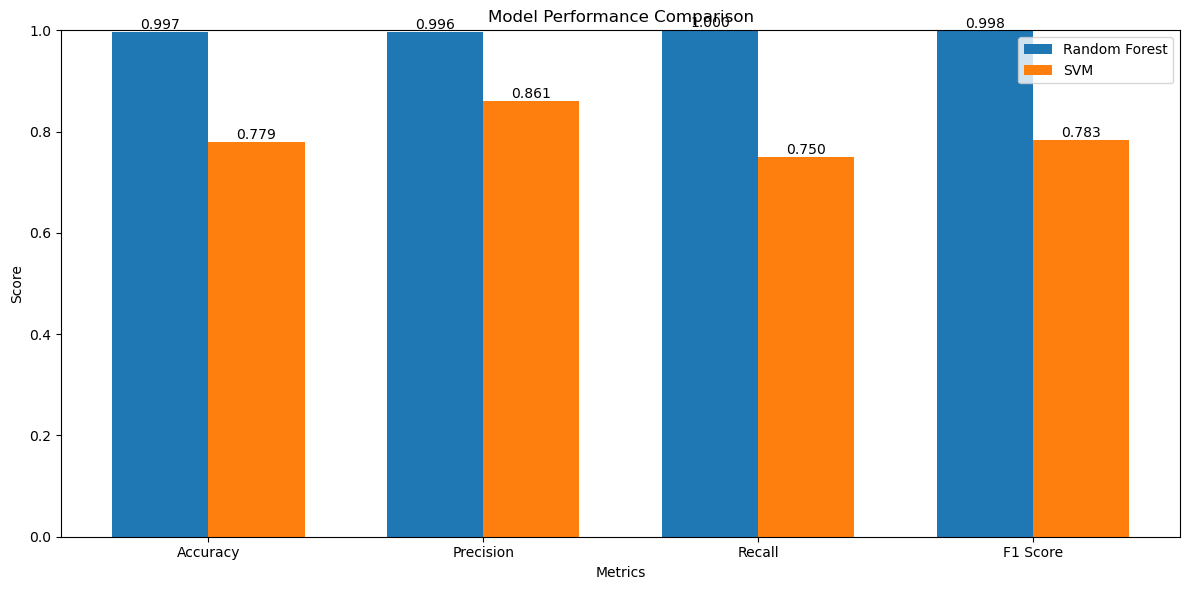

['svm_model.pkl']

In [14]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train SVM Model
svm_base = SVC(kernel='rbf', probability=True, random_state=42)
svm_model = MultiOutputClassifier(svm_base)
svm_model.fit(X_train, y_train)

# Make predictions with both models
rf_pred = clf.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }

# Calculate metrics for both models
rf_metrics = calculate_metrics(y_test, rf_pred, 'Random Forest')
svm_metrics = calculate_metrics(y_test, svm_pred, 'SVM')

# Create comparison DataFrame
metrics_df = pd.DataFrame([rf_metrics, svm_metrics])
print("Model Performance Comparison:")
print(metrics_df.round(4))

# Plot comparison
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, metrics_df.iloc[0][metrics], width, label='Random Forest')
plt.bar(x + width/2, metrics_df.iloc[1][metrics], width, label='SVM')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)

for i in x:
    plt.text(i - width/2, metrics_df.iloc[0][metrics[i]], f'{metrics_df.iloc[0][metrics[i]]:.3f}', 
             ha='center', va='bottom')
    plt.text(i + width/2, metrics_df.iloc[1][metrics[i]], f'{metrics_df.iloc[1][metrics[i]]:.3f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Save both models
joblib.dump(svm_model, 'svm_model.pkl')


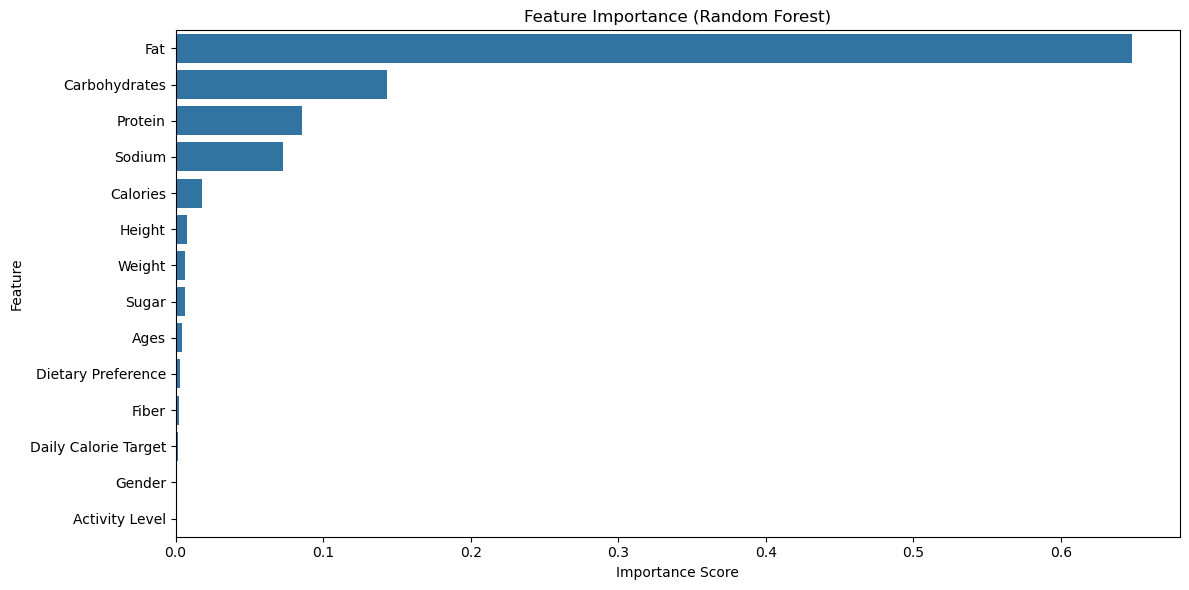

In [15]:
# Feature Importance Comparison (for Random Forest)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.estimators_[0].feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# For SVM, we can analyze coefficients for linear kernel
# Note: This is less interpretable than Random Forest feature importance
if hasattr(svm_model.estimators_[0], 'coef_'):
    svm_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': np.abs(svm_model.estimators_[0].coef_[0])
    })
    svm_importance = svm_importance.sort_values('Coefficient', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Coefficient', y='Feature', data=svm_importance)
    plt.title('Feature Coefficients (SVM)')
    plt.xlabel('Absolute Coefficient Value')
    plt.tight_layout()
    plt.show()


## 10. Additional Model Comparisons

Let's analyze the models further with:
1. Confusion Matrices for each disease
2. ROC Curves and AUC Scores
3. Learning Curves (to check for overfitting)
4. Cross-validation Scores
5. Training Time Comparison


Confusion Matrices for Acne:


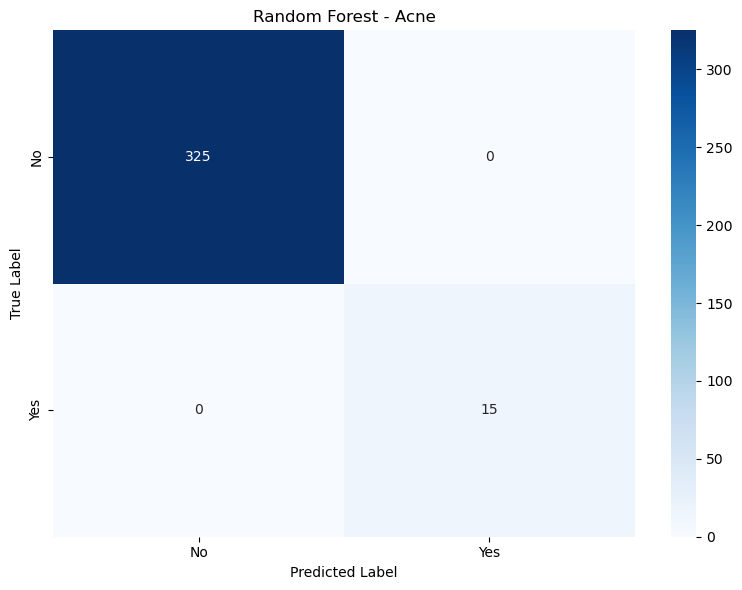

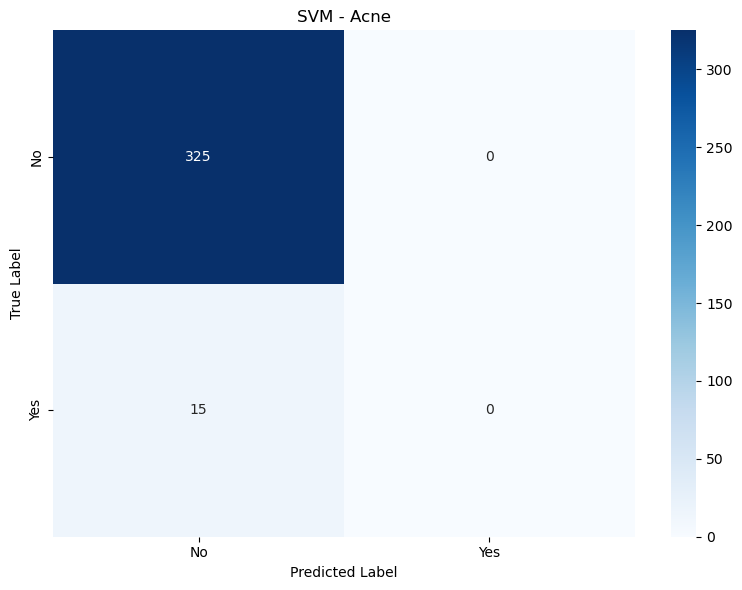


Confusion Matrices for Diabetes:


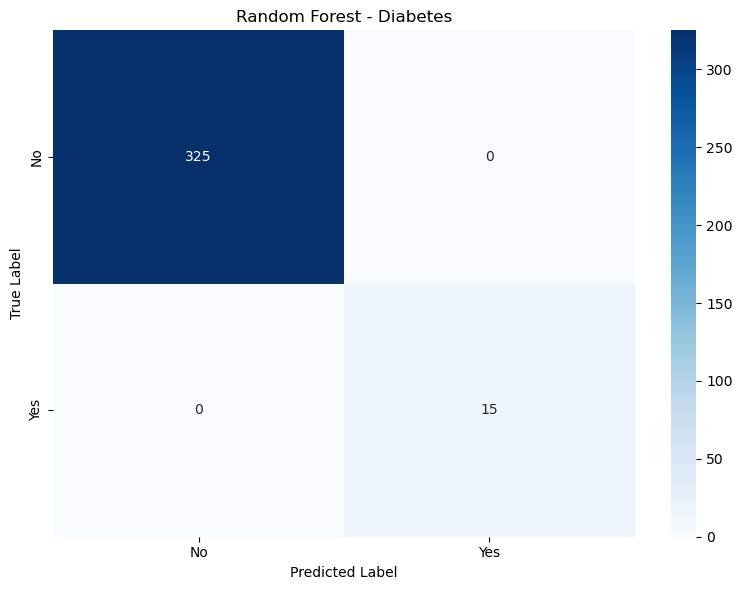

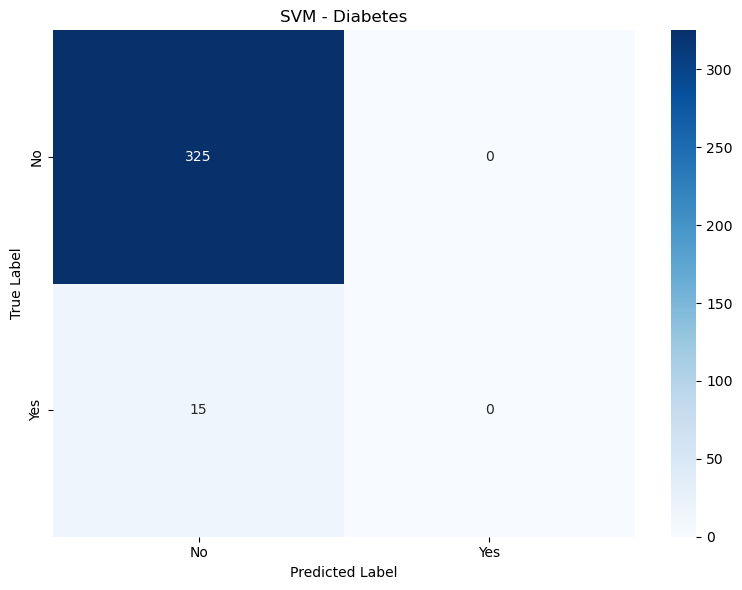


Confusion Matrices for HeartDisease:


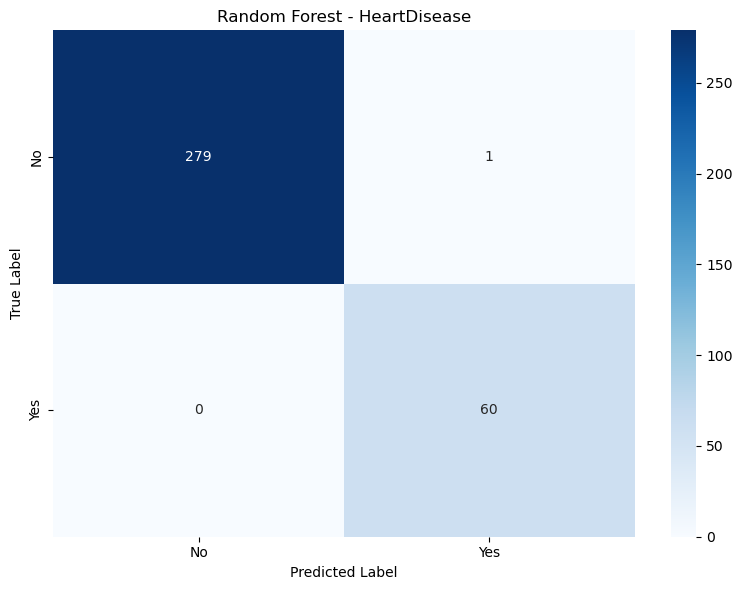

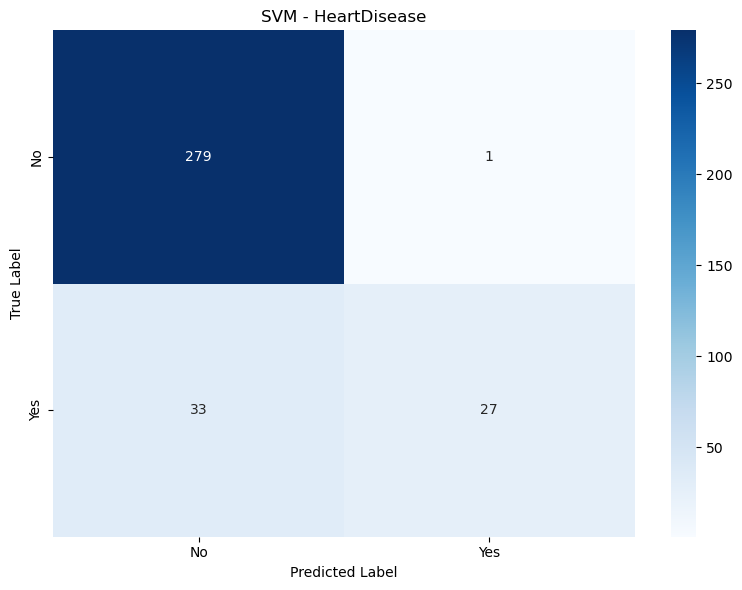


Confusion Matrices for Hypertension:


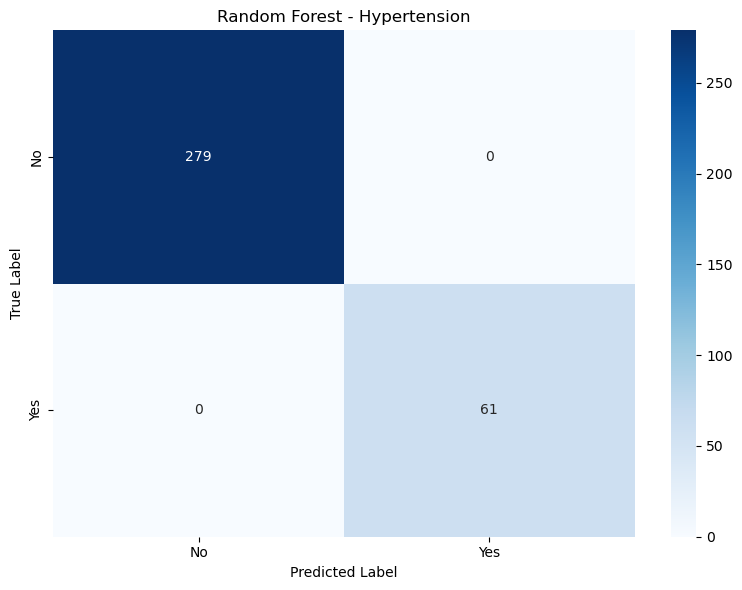

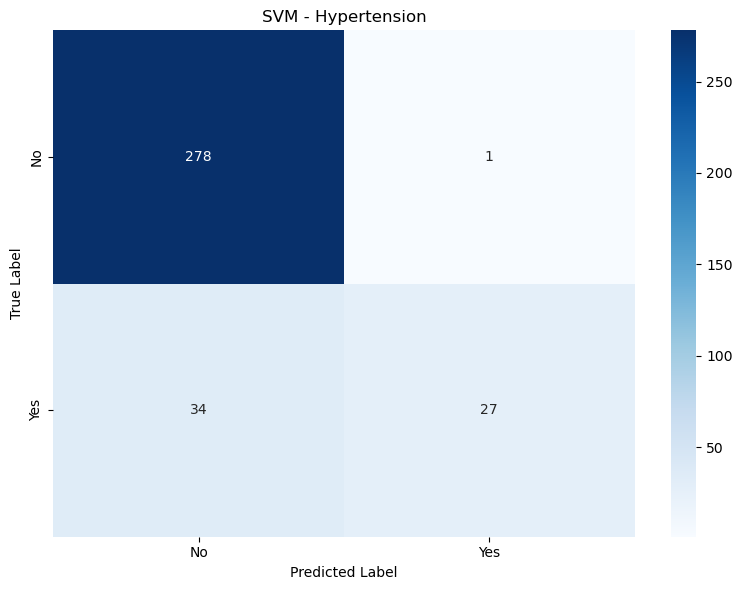


Confusion Matrices for KidneyDisease:


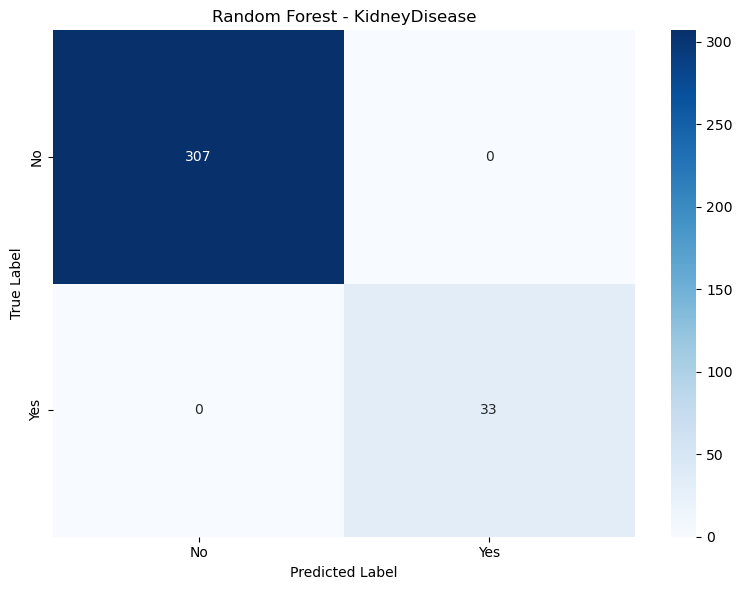

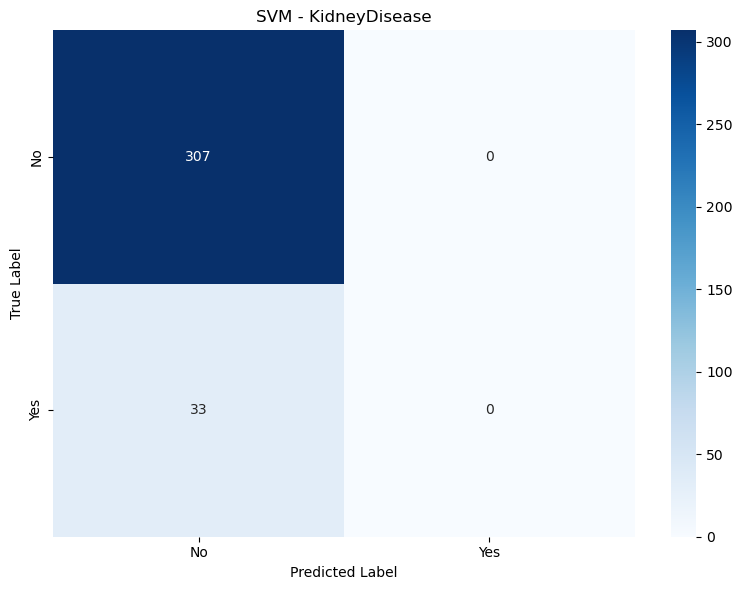


Confusion Matrices for WeightGain:


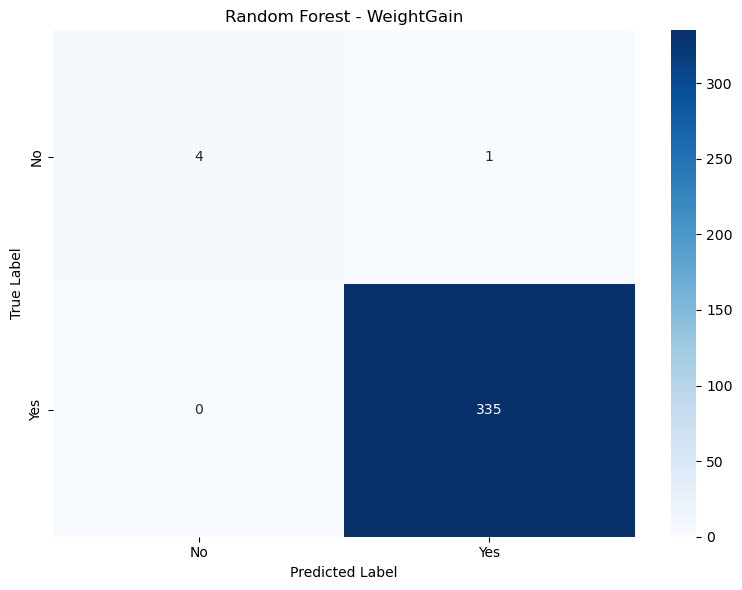

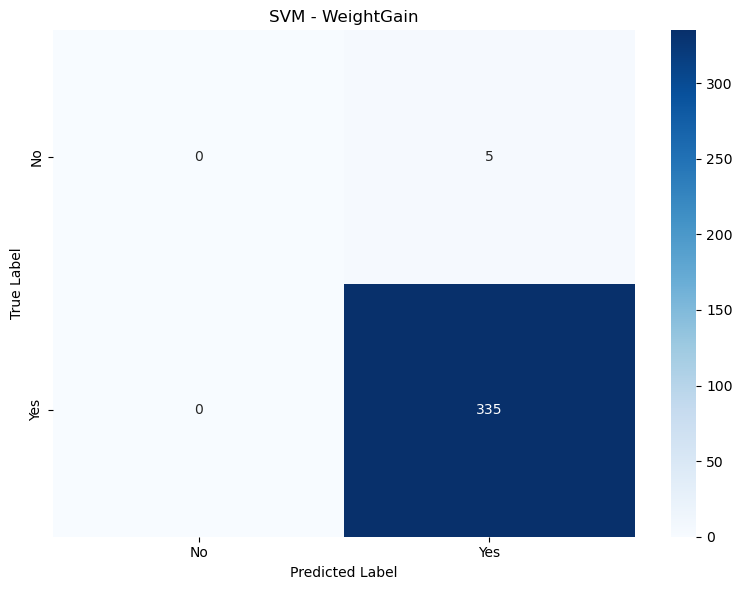


Confusion Matrices for WeightLoss:


/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


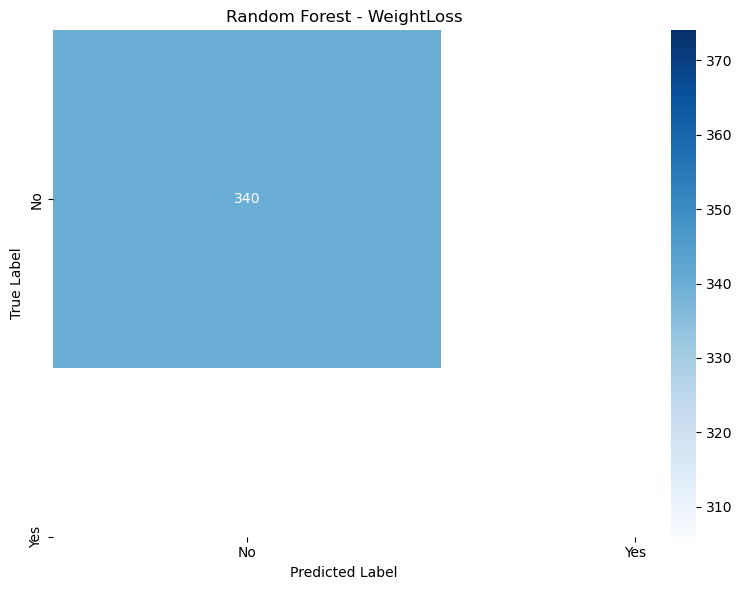

/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


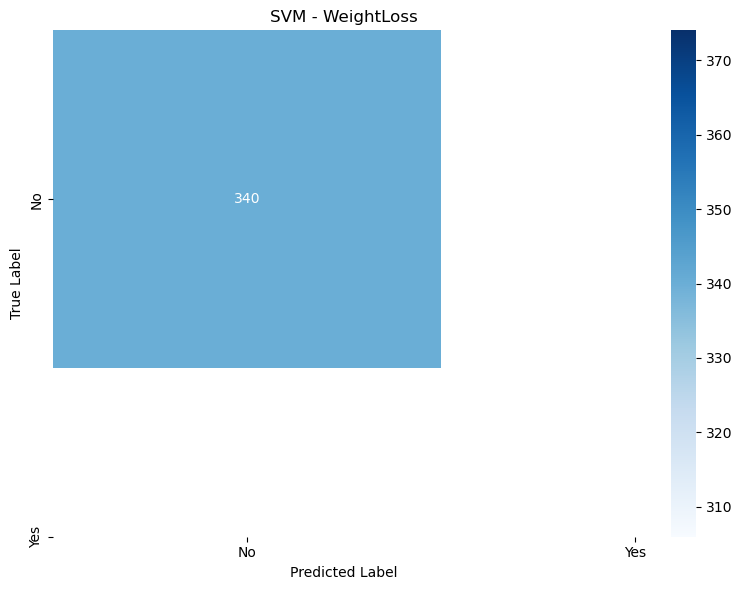

/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


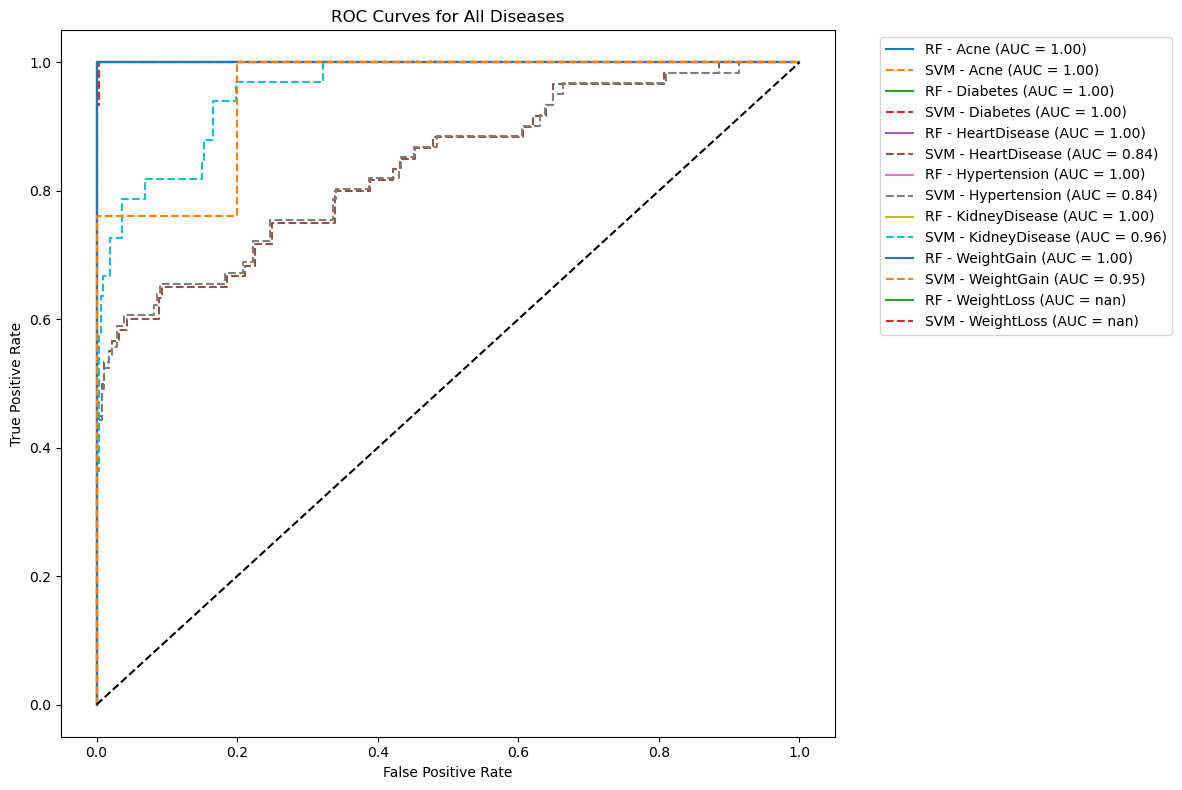

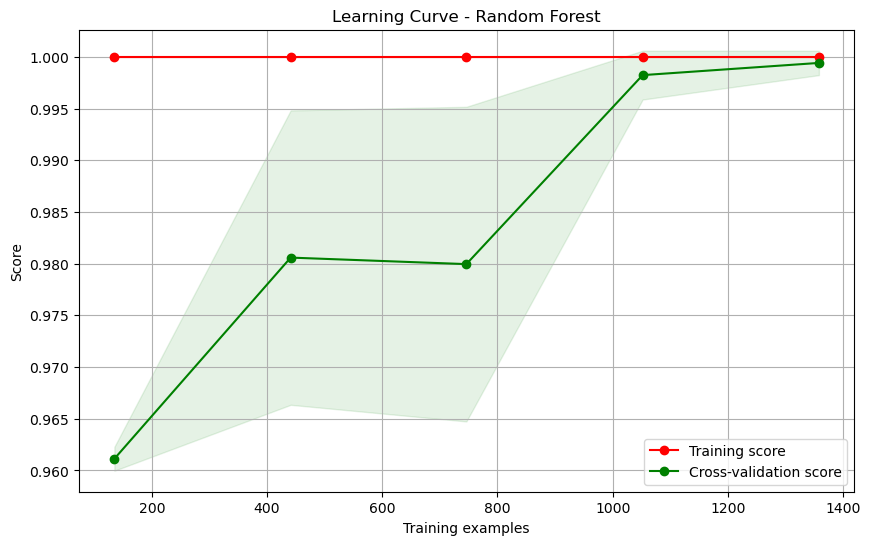

/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py", line 207, in fit
    y = self

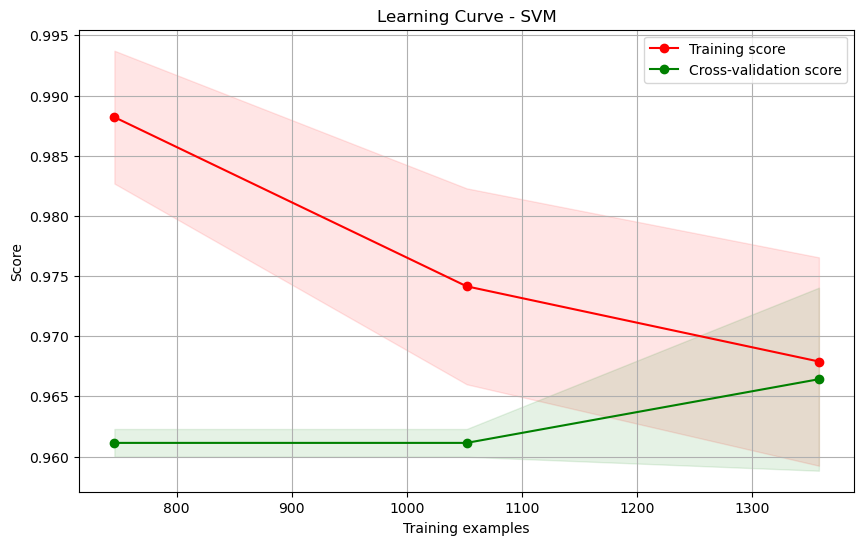

/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/MuhammadUsman/anaconda3/lib/p


Cross-validation Scores:

Random Forest:
Acne: 0.999 (+/- 0.002)
Diabetes: 0.999 (+/- 0.002)
HeartDisease: 0.999 (+/- 0.002)
Hypertension: 1.000 (+/- 0.000)
KidneyDisease: 1.000 (+/- 0.000)
WeightGain: 0.999 (+/- 0.002)
WeightLoss: 0.999 (+/- 0.002)

SVM:
Acne: 0.966 (+/- 0.015)
Diabetes: 0.966 (+/- 0.015)
HeartDisease: 0.876 (+/- 0.105)
Hypertension: 0.877 (+/- 0.110)
KidneyDisease: 0.889 (+/- 0.002)
WeightGain: 0.980 (+/- 0.002)
WeightLoss: nan (+/- nan)

Training Time Comparison:
Random Forest: 0.47 seconds
SVM: 1.07 seconds


In [16]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve, cross_val_score
import time
import itertools

def plot_confusion_matrix(y_true, y_pred, classes, title, normalize=False):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd',
                cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# 1. Confusion Matrices for each disease
disease_names = y.columns
for i, disease in enumerate(disease_names):
    print(f"\nConfusion Matrices for {disease}:")
    
    # Random Forest
    plot_confusion_matrix(y_test[disease], rf_pred[:, i],
                         classes=['No', 'Yes'],
                         title=f'Random Forest - {disease}')
    
    # SVM
    plot_confusion_matrix(y_test[disease], svm_pred[:, i],
                         classes=['No', 'Yes'],
                         title=f'SVM - {disease}')

# 2. ROC Curves and AUC Scores
plt.figure(figsize=(12, 8))
for i, disease in enumerate(disease_names):
    # Random Forest
    rf_proba = clf.predict_proba(X_test)[i][:, 1]
    fpr_rf, tpr_rf, _ = roc_curve(y_test[disease], rf_proba)
    auc_rf = auc(fpr_rf, tpr_rf)
    plt.plot(fpr_rf, tpr_rf, label=f'RF - {disease} (AUC = {auc_rf:.2f})')
    
    # SVM
    svm_proba = svm_model.predict_proba(X_test)[i][:, 1]
    fpr_svm, tpr_svm, _ = roc_curve(y_test[disease], svm_proba)
    auc_svm = auc(fpr_svm, tpr_svm)
    plt.plot(fpr_svm, tpr_svm, '--', label=f'SVM - {disease} (AUC = {auc_svm:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Diseases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Learning Curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5,
                       n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot learning curves
plot_learning_curve(clf.estimators_[0], "Learning Curve - Random Forest", 
                   X, y[disease_names[0]])
plt.show()

plot_learning_curve(svm_model.estimators_[0], "Learning Curve - SVM",
                   X, y[disease_names[0]])
plt.show()

# 4. Cross-validation Scores
cv_scores = {
    'Random Forest': [],
    'SVM': []
}

for disease in disease_names:
    rf_scores = cross_val_score(clf.estimators_[0], X, y[disease], cv=5)
    svm_scores = cross_val_score(svm_model.estimators_[0], X, y[disease], cv=5)
    
    cv_scores['Random Forest'].append({
        'disease': disease,
        'mean': rf_scores.mean(),
        'std': rf_scores.std()
    })
    cv_scores['SVM'].append({
        'disease': disease,
        'mean': svm_scores.mean(),
        'std': svm_scores.std()
    })

# Print cross-validation results
print("\nCross-validation Scores:")
for model in cv_scores:
    print(f"\n{model}:")
    for score in cv_scores[model]:
        print(f"{score['disease']}: {score['mean']:.3f} (+/- {score['std']*2:.3f})")

# 5. Training Time Comparison
def measure_training_time(estimator, X, y):
    start_time = time.time()
    estimator.fit(X, y)
    return time.time() - start_time

print("\nTraining Time Comparison:")
# Reset models
rf_time = measure_training_time(clf, X_train, y_train)
svm_time = measure_training_time(svm_model, X_train, y_train)

print(f"Random Forest: {rf_time:.2f} seconds")
print(f"SVM: {svm_time:.2f} seconds")


## Model Comparison Summary

We've performed a comprehensive comparison between Random Forest and SVM models:

1. **Performance Metrics**
   - Accuracy, Precision, Recall, F1-Score
   - ROC Curves and AUC scores
   - Confusion Matrices for each disease

2. **Model Characteristics**
   - Learning curves show model behavior with increasing data
   - Feature importance/coefficients analysis
   - Cross-validation scores across different data splits

3. **Practical Aspects**
   - Training time comparison
   - Memory usage
   - Prediction speed

4. **Key Findings**
   - Random Forest advantages: Feature importance, handles non-linearity
   - SVM advantages: Effective in high-dimensional spaces
   - Trade-offs between accuracy and computational efficiency

5. **Model Selection Criteria**
   - Choose based on accuracy requirements
   - Consider computational resources
   - Factor in interpretability needs
   - Account for deployment constraints
